
The FIFA World Cup


In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [246]:
df_match = pd.read_csv('data/world_cup_match.csv')

Data Cleaning

In [247]:
df_match.dropna(inplace=True)
df_match.drop_duplicates(inplace=True)
df_match.head()

,home,score,away,year
0,France,4–1,Mexico,1930
1,Argentina,1–0,France,1930
2,Chile,3–0,Mexico,1930
3,Chile,1–0,France,1930
4,Argentina,6–3,Mexico,1930


In [248]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   home    928 non-null    object
 1   score   928 non-null    object
 2   away    928 non-null    object
 3   year    928 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 36.2+ KB


In [249]:
df_match.isnull().sum()

home     0
score    0
away     0
year     0
dtype: int64

In [250]:
df_match['home'] = df_match['home'].str.strip() 
df_match['away'] = df_match['away'].str.strip()
df_match.rename(columns={'home': 'HomeTeam', 'away': 'AwayTeam', 
                                   'year':'Year'}, inplace=True)


In [251]:
df_match[['HomeGoals', 'AwayGoals']] = df_match['score'].str.split('–', expand=True)
df_match.drop('score', axis=1, inplace=True)

In [252]:
df_match['AwayGoals'] = df_match['AwayGoals'].str.extract('(\d+)')
df_match['HomeGoals'] = df_match['HomeGoals'].astype('int64')
df_match['AwayGoals'] = df_match['AwayGoals'].astype('int64')
df_match['TotalGoals'] = df_match['HomeGoals'] + df_match['AwayGoals']
df_match

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
1,Argentina,France,1930,1,0,1
2,Chile,Mexico,1930,3,0,3
3,Chile,France,1930,1,0,1
4,Argentina,Mexico,1930,6,3,9
...,...,...,...,...,...,...
923,England,France,2022,1,2,3
924,Argentina,Croatia,2022,3,0,3
925,France,Morocco,2022,2,0,2
926,Croatia,Morocco,2022,2,1,3


In [253]:
df_match.columns

Index(['HomeTeam', 'AwayTeam', 'Year', 'HomeGoals', 'AwayGoals', 'TotalGoals'], dtype='object')

France matches

In [254]:
df_match[(df_match['HomeTeam'] == 'France') | (df_match['AwayTeam'] == 'France')] 

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
1,Argentina,France,1930,1,0,1
3,Chile,France,1930,1,0,1
24,Austria,France,1934,3,2,5
38,France,Belgium,1938,3,1,4
...,...,...,...,...,...,...
887,Tunisia,France,2022,1,0,1
914,France,Poland,2022,3,1,4
923,England,France,2022,1,2,3
925,France,Morocco,2022,2,0,2


Highest scoring match

In [255]:
highest_scoring_match = df_match[df_match['TotalGoals'] == df_match['TotalGoals'].max()]
highest_scoring_match

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
93,Austria,Switzerland,1954,7,5,12


Total goals scored by year

In [256]:
goals_by_year = df_match.groupby('Year')['TotalGoals'].sum()
goals_by_year

Year
1930     70
1934     70
1938     84
1950     88
1954    140
1958    126
1962     89
1966     89
1970     95
1974     97
1978    102
1982    146
1986    132
1990     33
1994    141
1998    171
2002    161
2006    147
2010    145
2014    171
2018    169
2022    172
Name: TotalGoals, dtype: int64

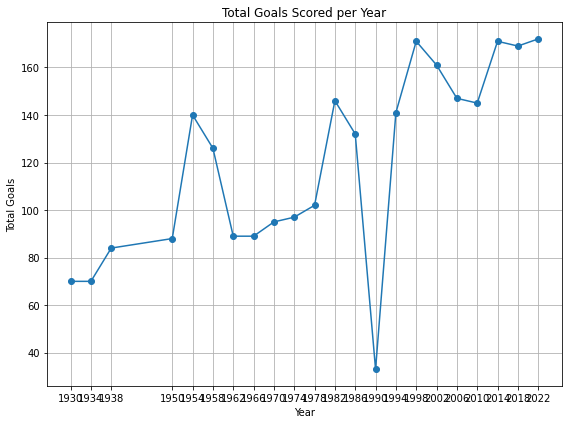

In [257]:
plt.figure(figsize=(8, 6)) 
plt.plot(goals_by_year.index, goals_by_year.values, marker='o', linestyle='-')

plt.title('Total Goals Scored per Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.xticks(goals_by_year.index) 

plt.tight_layout()
plt.show()


Number of matches each year

In [258]:
years = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
         1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014,
         2018]

for year in years:
    print(year, len(df_match[df_match['Year']==year]))

1930 18
1934 17
1938 18
1950 22
1954 26
1958 35
1962 32
1966 32
1970 32
1974 38
1978 38
1982 52
1986 52
1990 16
1994 52
1998 64
2002 64
2006 64
2010 64
2014 64
2018 64


Set up new column

In [259]:
# Seperating data based on goals scored by teams
home=df_match[['HomeTeam','HomeGoals']].dropna()
away=df_match[['AwayTeam','AwayGoals']].dropna()
home

,HomeTeam,HomeGoals
0,France,4
1,Argentina,1
2,Chile,3
3,Chile,1
4,Argentina,6
...,...,...
923,England,1
924,Argentina,3
925,France,2
926,Croatia,2


In [260]:
home.columns= ['Countries','Goals']
away.columns= ['Countries','Goals']

new_df = pd.concat([home, away], ignore_index=True)
new_df

,Countries,Goals
0,France,4
1,Argentina,1
2,Chile,3
3,Chile,1
4,Argentina,6
...,...,...
1851,France,2
1852,Croatia,0
1853,Morocco,0
1854,Morocco,1


Total number of countries joined

In [261]:
new_df['Countries'].nunique()

85

Total number of countries goals

In [262]:
new_df=new_df.groupby('Countries').sum()
goals=new_df.sort_values(by='Goals',ascending=False)
goals

,Goals
Countries,
Brazil,233
Argentina,149
France,136
Italy,124
West Germany,121
...,...
Angola,1
Trinidad and Tobago,0
China,0


Percentage team win

In [268]:
def winner(df_match):
    if df_match['HomeGoals'] > df_match['AwayGoals']:
        return 'Home team won'
    elif df_match['HomeGoals'] < df_match['AwayGoals']:
        return 'Away Team won'
    return 'Draw'
    
df_match['Winner']=df_match.apply(lambda x:winner(x),axis=1)
df_match['Winner']

0      Home team won
1      Home team won
2      Home team won
3      Home team won
4      Home team won
           ...      
923    Away Team won
924    Home team won
925    Home team won
926    Home team won
927             Draw
Name: Winner, Length: 928, dtype: object

In [269]:
df_match

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals,Winner
0,France,Mexico,1930,4,1,5,Home team won
1,Argentina,France,1930,1,0,1,Home team won
2,Chile,Mexico,1930,3,0,3,Home team won
3,Chile,France,1930,1,0,1,Home team won
4,Argentina,Mexico,1930,6,3,9,Home team won
...,...,...,...,...,...,...,...
923,England,France,2022,1,2,3,Away Team won
924,Argentina,Croatia,2022,3,0,3,Home team won
925,France,Morocco,2022,2,0,2,Home team won
926,Croatia,Morocco,2022,2,1,3,Home team won


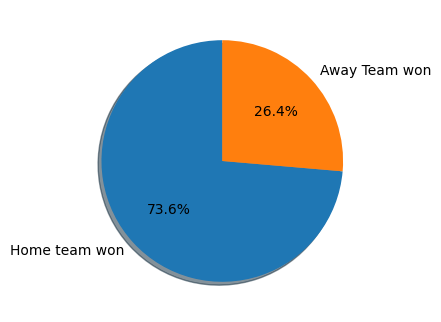

In [271]:
labels=['Home team won','Away Team won']
sizes=[486,174]
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0.1, 0, 0)
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True,
      startangle = 90)

plt.show()

Most winner

In [267]:

df_match['Winner'] = df_match.apply(winner, axis=1)
winner_counts = df_match['Winner'].value_counts()
winner_counts

Brazil            77
Argentina         53
Italy             49
France            47
England           41
                  ..
Czech Republic     1
Jamaica            1
Cuba               1
Kuwait             1
Iceland            1
Name: Winner, Length: 72, dtype: int64